<a href="https://colab.research.google.com/github/lnguye782/ECGR-4105-Intro-to-ML/blob/main/ECGR_4105_HW1_Source_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [65]:
file_url = 'https://raw.githubusercontent.com/lnguye782/ECGR-4105-Intro-to-ML/main/HW1/D3.csv'
data = pd.read_csv(file_url)

data.head()

,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375


In [66]:
# Define explanatory variables (X1, X2, X3) and dependent variable (Y)
X1 = data['X1'].values
X2 = data['X2'].values
X3 = data['X3'].values
Y = data['Y'].values

In [67]:
# Function for gradient descent for linear regression
def gradient_descent(X, Y, learning_rate, iterations):
    m = 0 # Slope
    b = 0 # Intercept
    n = len(Y)
    losses = []

    for i in range(iterations):
        # Prediction for Y
        Y_pred = b + m * X

        # Calculate Mean Squared Error (loss)
        loss = (1/n) * np.sum((Y - Y_pred) ** 2)
        losses.append(loss)

        # Gradient descent update rules
        d_m = (-2 / n) * np.sum(X * (Y - Y_pred))
        d_b = (-2 / n) * np.sum(Y - Y_pred)

        # Update m and b
        m -= learning_rate * d_m
        b -= learning_rate * d_b

    return m, b, losses

In [74]:
# Set parameters for gradient descent
learning_rate = 0.05
iterations = 1000

# Train gradient descent for X1, X2, and X3 (three different training)
m1, b1, loss1 = gradient_descent(X1, Y, learning_rate, iterations)
m2, b2, loss2 = gradient_descent(X2, Y, learning_rate, iterations)
m3, b3, loss3 = gradient_descent(X3, Y, learning_rate, iterations)

# Report the linear model for each explanatory variable
linear_models = {
    'X1': (m1, b1),
    'X2': (m2, b2),
    'X3': (m3, b3)
}

linear_models

{'X1': (-2.038336633229477, 5.9279489169790756),
 'X2': (0.5576076103651677, 0.7360604300111252),
 'X3': (-0.5204828841600003, 2.8714221036339524)}

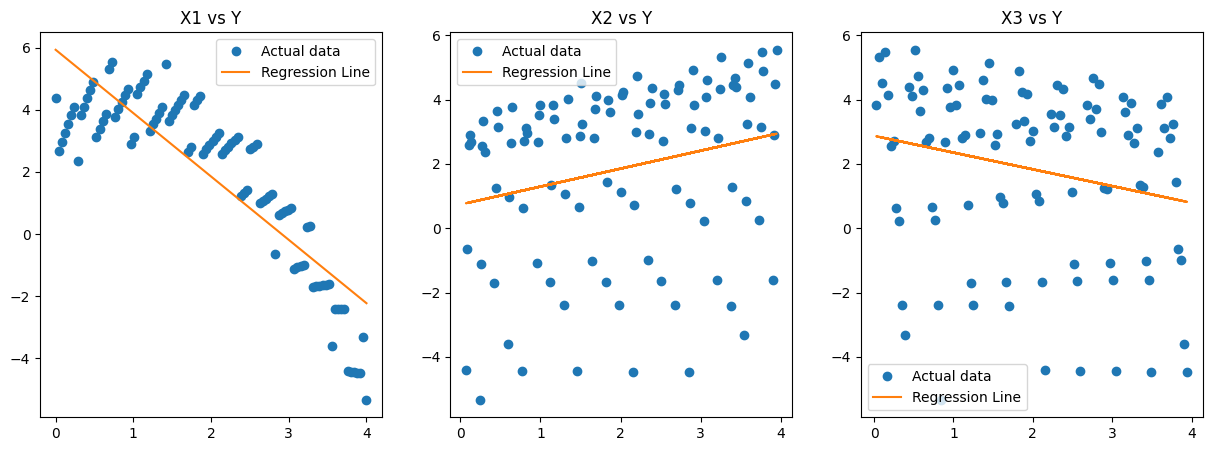

In [69]:
# Plot the final regression model over the iteration per each explanatory variable
plt.figure(figsize=(15, 5))

# Plot for X1
plt.subplot(1, 3, 1)
plt.plot(X1, Y, 'o', label="Actual data")
plt.plot(X1, m1 * X1 + b1, label="Regression Line")
plt.title('X1 vs Y')
plt.legend()

# Plot for X2
plt.subplot(1, 3, 2)
plt.plot(X2, Y, 'o', label="Actual data")
plt.plot(X2, m2 * X2 + b2, label="Regression Line")
plt.title('X2 vs Y')
plt.legend()

# Plot for X3
plt.subplot(1, 3, 3)
plt.plot(X3, Y, 'o', label="Actual data")
plt.plot(X3, m3 * X3 + b3, label="Regression Line")
plt.title('X3 vs Y')
plt.legend()

plt.show()

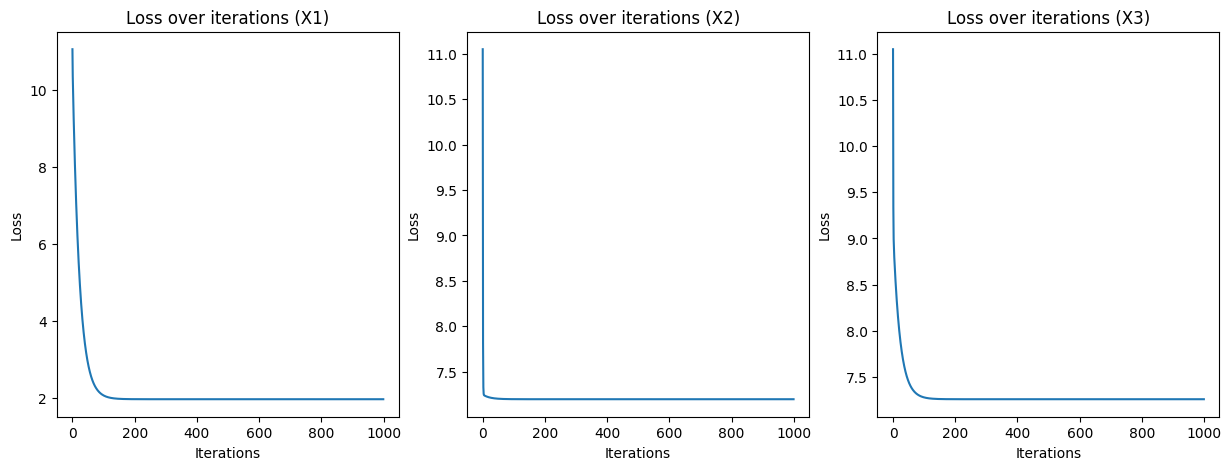

In [70]:
# Plot the loss over the iteration per each explanatory variable
plt.figure(figsize=(15, 5))

# Loss for X1
plt.subplot(1, 3, 1)
plt.plot(loss1)
plt.title('Loss over iterations (X1)')
plt.xlabel('Iterations')
plt.ylabel('Loss')

# Loss for X2
plt.subplot(1, 3, 2)
plt.plot(loss2)
plt.title('Loss over iterations (X2)')
plt.xlabel('Iterations')
plt.ylabel('Loss')

# Loss for X3
plt.subplot(1, 3, 3)
plt.plot(loss3)
plt.title('Loss over iterations (X3)')
plt.xlabel('Iterations')
plt.ylabel('Loss')

plt.show()

In [77]:
# Determine which explanatory variable has the lower loss (cost) for explaining the output (Y)
final_losses = {
    "X1": loss1[-1],
    "X2": loss2[-1],
    "X3": loss3[-1]
}

final_losses

{'X1': 1.9699861650811892, 'X2': 7.198732036336083, 'X3': 7.258902249215831}

In [75]:
# Function for gradient descent for multiple explanaroty variables (X1, X2, X3)
def gradient_descent_multi(X, Y, multi_learning_rate, multi_iterations):
    # Initialize parameters to zero (theta0, theta1, theta2, theta3)
    theta = np.zeros(X.shape[1])
    n = len(Y)
    losses = []

    for i in range(multi_iterations):
        # Predicted value of Y
        Y_pred = np.dot(X, theta)

        # Calculate the Mean Squared Error (loss)
        loss = (1/n) * np.sum((Y - Y_pred) ** 2)
        losses.append(loss)

        # Gradient descent update rule
        gradient = (-2 / n) * np.dot(X.T, (Y - Y_pred))

        # Update theta
        theta = theta - multi_learning_rate * gradient

    return theta, losses

In [76]:
X_multi = np.c_[np.ones(len(X1)), X1, X2, X3]

# Set parameters for gradient descent
multi_learning_rate = 0.05
multi_iterations = 1000

# Train multiple explanatory variables
theta, loss_multi = gradient_descent_multi(X_multi, Y, multi_learning_rate, multi_iterations)

# Report the final linear model
linear_model_multi = theta

linear_model_multi

array([ 5.31393577, -2.00368658,  0.53260157, -0.26556795])

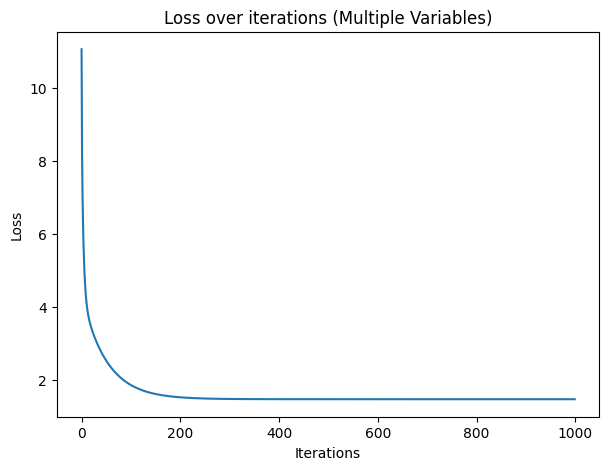

In [78]:
# Plotting the loss over iterations for multiple variables
plt.figure(figsize=(7, 5))

plt.plot(loss_multi)
plt.title('Loss over iterations (Multiple Variables)')
plt.xlabel('Iterations')
plt.ylabel('Loss')

plt.show()

In [80]:
# Predict the value of y for new (X1, X2, X3) values (1, 1, 1), for (2, 0, 4), and for (3, 2, 1).
new_values = np.array([[1, 1, 1, 1], [1, 2, 0, 4], [1, 3, 2, 1]])  # Include the intercept (1)
predictions = np.dot(new_values, theta)

predictions

array([3.57728282, 0.24429082, 0.10251123])